In [1]:
import numpy as np
import torch
import torch.nn as nn
from torch.optim import SGD
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
x = torch.tensor([[1, 2], [5,6], [1,4], [6,10]]).float()
y = torch.tensor([1, 6, 6, 1]).float()

In [9]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.W1 = nn.Linear(2, 8, bias = False)
        self.W2 = nn.Linear(8, 1, bias = False)
        self.relu = nn.ReLU()
    def forward(self, x):
        x = self.W2(self.relu(self.W1(x)))
        return x.flatten()

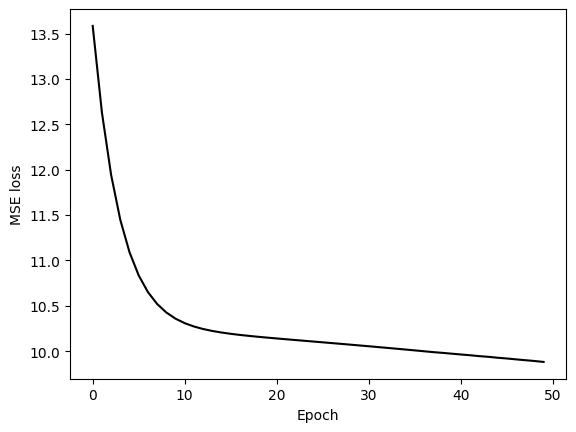

In [16]:
def train(x, y, net, epochs_num, α):
    network = net()
    opt = SGD(network.parameters(), lr = α)
    l = nn.MSELoss()
    losses = []
    for _ in range(epochs_num):
        opt.zero_grad()
        loss = l(network(x), y)
        loss.backward()
        opt.step()
        losses.append(loss.item())

    plt.plot(np.arange(epochs_num), losses, "k")
    plt.xlabel("Epoch")
    plt.ylabel("MSE loss")

    pass

train(x, y, Net, 50, 0.001)

In [24]:
class Net2(nn.Module):
    def __init__(self):
        super().__init__()
        self.W1 = nn.Linear(2, 50)
        self.W2 = nn.Linear(50, 50)
        self.W3 = nn.Linear(50, 1)
        self.relu = nn.ReLU()
    def forward(self, x):
        x = self.W3(self.relu(self.W2(self.relu(self.W1(x)))))
        return x.flatten()

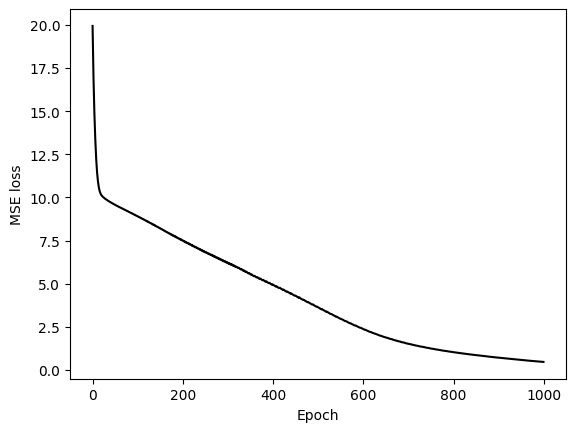

In [26]:
train(x, y, Net2, 1000, 0.001)